In [1]:
!pip uninstall -y pillow
!pip install pillow==9.5.0

Found existing installation: pillow 11.2.1
Uninstalling pillow-11.2.1:
  Successfully uninstalled pillow-11.2.1
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 6.4 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scikit-image 0.25.2 requires pillow>=10.1, but you have pillow 9.5.0 which is incompatible.


In [2]:
!pip install facenet-pytorch --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 676.1 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 50.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 53.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 755.6/755.6 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 47.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 39.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 43.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2

In [1]:
import torch
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from facenet_pytorch import MTCNN
from google.colab import files

In [2]:
# Uploading an image (JPG, PNG etc.)
uploaded = files.upload()

Saving people1.jpg to people1.jpg


In [3]:
image_path = list(uploaded.keys())[0]
image = Image.open(image_path).convert('RGB')

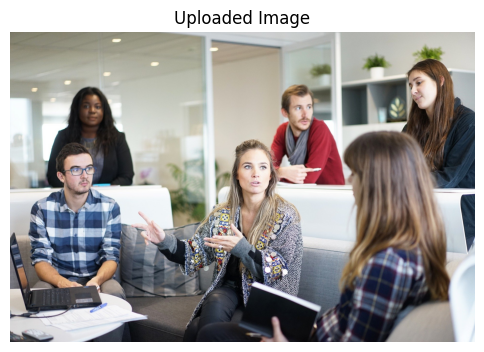

In [4]:
plt.figure(figsize=(6,6))
plt.imshow(image)
plt.axis('off')
plt.title("Uploaded Image")
plt.show()

In [5]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print("Running on:", device)
mtcnn = MTCNN(keep_all=True, device=device)

Running on: cpu


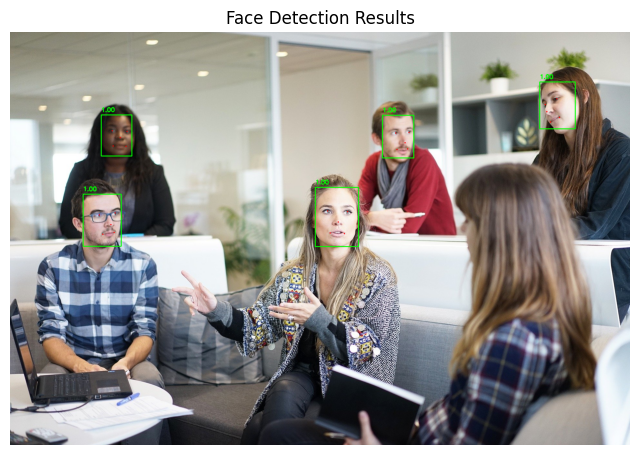

In [6]:
# Detecting boxes, probabilities, landmarks
boxes, probs, landmarks = mtcnn.detect(image, landmarks=True)
# Converting to NumPy to draw
image_np = np.array(image).copy()
# Drawing results
if boxes is not None:
    for box, prob, lm in zip(boxes, probs, landmarks):
        box = box.astype(int)
        cv2.rectangle(image_np, tuple(box[:2]), tuple(box[2:]), (0, 255, 0), 2)
        for x, y in lm:
            cv2.circle(image_np, (int(x), int(y)), 2, (255, 0, 0), -1)
        cv2.putText(image_np, f"{prob:.2f}", (box[0], box[1] - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)
# Showing final image with face detection
plt.figure(figsize=(8,6))
plt.imshow(image_np)
plt.axis('off')
plt.title("Face Detection Results")
plt.show()

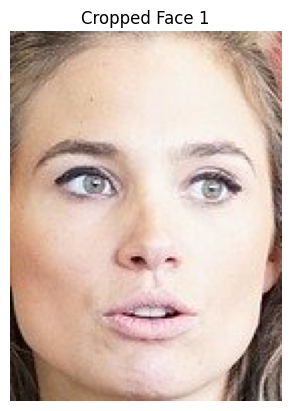

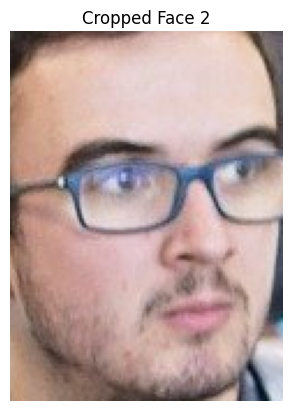

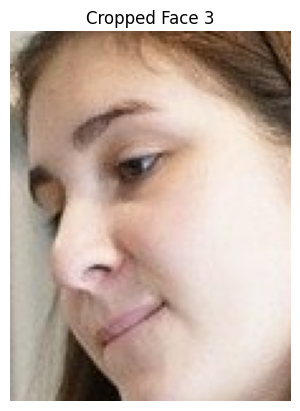

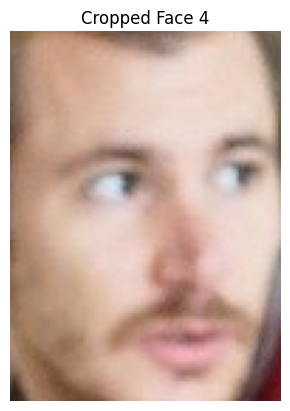

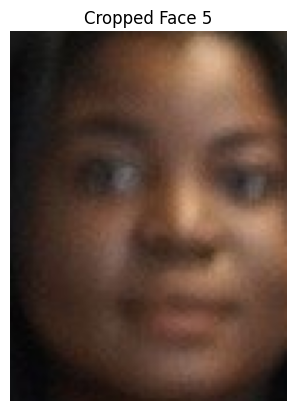

In [7]:
# Displaying each detected face separately
if boxes is not None:
    for i, box in enumerate(boxes):
        face = image.crop(box)
        plt.figure()
        plt.imshow(face)
        plt.axis("off")
        plt.title(f"Cropped Face {i+1}")
        plt.show()

In [10]:
#making it as a function
def detect_faces_in_uploaded_images():
    print("📁 Upload one or more images...")
    uploaded = files.upload()

    for img_name in uploaded.keys():
        image = Image.open(img_name).convert('RGB')
        boxes, probs, landmarks = mtcnn.detect(image, landmarks=True)
        image_np = np.array(image).copy()

        if boxes is not None:
            for box, prob, lm in zip(boxes, probs, landmarks):
                if prob < 0.90:  # Filter out false positives like hands
                    continue

                box = box.astype(int)
                cv2.rectangle(image_np, tuple(box[:2]), tuple(box[2:]), (0, 255, 0), 2)
                for x, y in lm:
                    cv2.circle(image_np, (int(x), int(y)), 2, (255, 0, 0), -1)
                cv2.putText(image_np, f"{prob:.2f}", (box[0], box[1]-10),
                            cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)

        plt.figure(figsize=(8,6))
        plt.imshow(image_np)
        plt.axis("off")
        plt.title(f"Detected: {img_name}")
        plt.show()


📁 Upload one or more images...


Saving people2.jpg to people2 (1).jpg


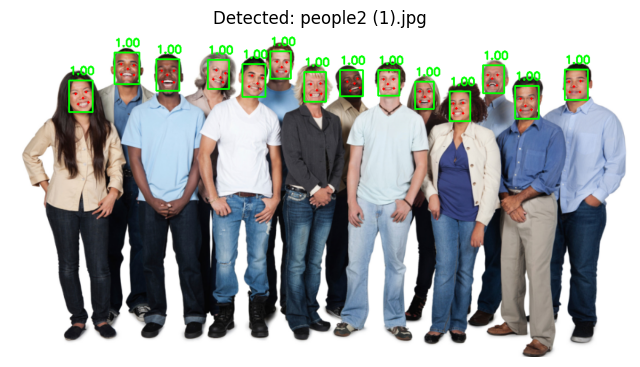

In [11]:
detect_faces_in_uploaded_images()

📁 Upload one or more images...


Saving people3.png to people3.png


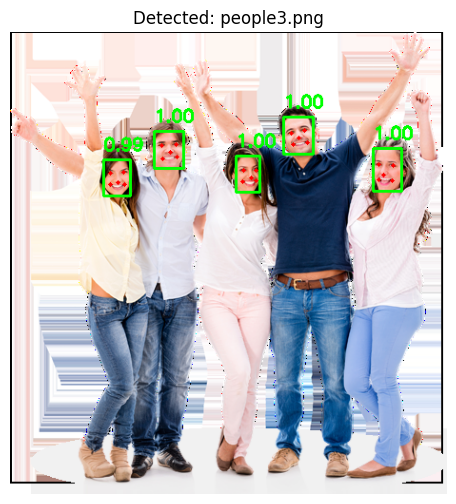

In [12]:
detect_faces_in_uploaded_images()